## Question 1 - Gray Edge Detection

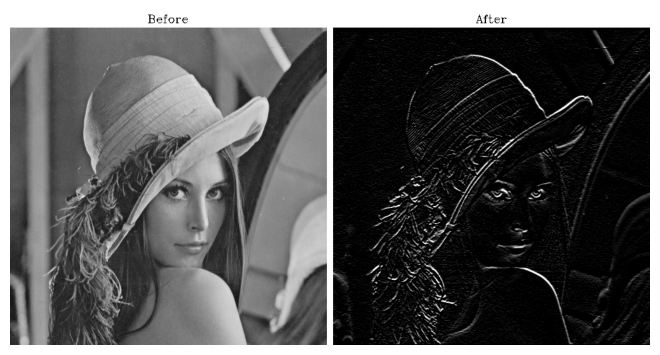

Output image saved in output_images/q1/edges.png


In [ ]:
# ================= This is done because all code files are stored inside 'code', harms intellisense though :(
#                   This is because we can't import a package from within jupyter(at least, I couldn't make it work)
import sys
sys.path.append("./code")
# =================

import cv_utils
from edge_detection import edge_detection
import cv2

OUTPUT_PATH = "output_images/q1"

img = cv2.imread("input_images/Lenna.png", cv2.IMREAD_GRAYSCALE)
image_edges = edge_detection(img)

cv_utils.display_images_notebook(titles=["Before", "After"], images=[img, image_edges])

output_file = f"{OUTPUT_PATH}/edges.png"
cv_utils.save_image(image_edges, output_file)
print(f"Output image saved in {output_file}")


### Example results

![blabla](example_images/q1/lenna_edges.png)

### Explanation

The filter provided,
\begin{bmatrix}
-1 & -2 & -1 \\
 0 &  0 &  0 \\
 1 &  2 &  1
\end{bmatrix}
Is a vertical edge detection filter. It detects changes in pixel intensity.

So, how does it work?
* Convolution: We slide the filter over the image pixel by pixel, evaluating the weighted sum of the surrounding 3x3 pixels.
    * The values in the filter matrix determine the weight of each pixel surrounding, including, the current pixel.
    * [A good demonstration](https://youtu.be/KuXjwB4LzSA?si=vzDYNE7SV8WN6ilp&t=654) made by 3Blue1Brown, explaining convolution in the context of edge detection.
* When there's a change in vertical intensity in a local region, the weighted sum will be large(in value), resulting in higher intensity edges in the output.
* When a local region has no change in vertical intensity (a uniform region), the weighted sum will be zero/close to zero, resulting in lower intensity in the output.
* Normalization: The result of the convolution might produce values that are negative, or exceeding 8bits(255). So we normalize the output image so every pixel's brightness will make sense- as an unsigned 8bit intensity value.
In this example, we emphasize positive values- transitions from lower intensities to higher intensities.

## Question 2

### 2.1

$$sinc(x) = \frac{\sin(\pi x)}{\pi x}$$

We will mark the Fourier transform of $sinc(x)$ as
$F(u)\mathcal{= F}\left\lbrack sinc(x) \right\rbrack$.

From the convolution theorem we get that

$$\mathcal{F}\left\lbrack sinc(x)*sinc(x) \right\rbrack\mathcal{= F}\left\lbrack sinc(x) \right\rbrack\mathcal{\times F}\left\lbrack sinc(x) \right\rbrack$$

So, our process will be like so-

1.  Calculate $\mathcal{F}\left\lbrack sinc(x) \right\rbrack$

2.  Calculate $\mathcal{F}\left\lbrack sinc(x)*sinc(x) \right\rbrack$

3.  Using the inverse Fourier transform, calculate $sinc(x)*sinc(x)$

[Step 1]{.underline}

We'll define the box function $h(t) = \left\{ \begin{array}{r}
1\ \ \ |t| < 0.5\ \ \ \  \\
0\ \ \ otherwise
\end{array} \right.\ $.

\begin{align*}
\mathcal{F}\left[ h(t) \right] 
&= \int_{-0.5}^{0.5} e^{-j2\pi ft} \, dt
= \left[ \frac{e^{-j2\pi ft}}{-j2\pi f} \right]_{-0.5}^{0.5} \\
&= -\frac{1}{2j\pi f} \left( e^{-j\pi f} - e^{j\pi f} \right) \\
&= \frac{1}{\pi f} \cdot \frac{e^{j\pi f} - e^{-j\pi f}}{2j} \\
&= \frac{\sin(\pi f)}{\pi f} 
= \text{sinc}(f).
\end{align*}

So $\mathcal{F}\left\lbrack h(t) \right\rbrack = sinc(f)$

$sinc(x)$ is even, meaning $sinc( - x) = sinc(x)$. So, we know that

$$(1)\mathcal{\ F}\left\lbrack sinc(f) \right\rbrack\mathcal{= F}\left\lbrack sinc( - f) \right\rbrack$$

From the duality property of Fourier transformations, we know that

$$(2)\mathcal{\ F}\left\lbrack sinc( - f) \right\rbrack = h(t)$$

Combining (1) and (2), we get that
$\mathcal{F}\left\lbrack sinc(f) \right\rbrack = h(t)$.

[Step 2]{.underline}

We know that the Fourier transformation of a convolution is the product
of the Fourier transformations.

So,
$\mathcal{F}\left\lbrack sinc(x)*sinc(x) \right\rbrack\mathcal{= F}\left\lbrack sinc(x) \right\rbrack\mathcal{\times F}\left\lbrack sinc(x) \right\rbrack = h^{2}(t) = h(t)$

[Step 3]{.underline}

Since we know that
$h(t)\mathcal{= F}\left\lbrack sinc(f) \right\rbrack$, by applying
$\mathcal{F}^{- 1}$, we get that
$\mathcal{F}^{- 1}\left\lbrack h(t) \right\rbrack = sinc(f)$.

And so, we got that

\begin{align*}
sinc(x) * sinc(x) 
&= \mathcal{F}^{-1} \left[ \mathcal{F} \left[ sinc(x) * sinc(x) \right] \right]
= \mathcal{F}^{-1} \left[ \mathcal{F} \left[ sinc(x) \right] \cdot \mathcal{F} \left[ sinc(x) \right] \right] \\
&= \mathcal{F}^{-1} \left[ h^2(t) \right]
= \mathcal{F}^{-1} \left[ h(t) \right]
= sinc(x).
\end{align*}

So $sinc(x)*sinc(x) = sinc(x)$.


### 2.2

Zooming means inserting new pixels to the image with some method to
define the values of the new pixels.

For example, zooming a $100 \times 100$ image to a $200 \times 200$
image involves adding 3 new pixels for every existing pixel.

We do it in four steps:

1.  Take the original image and apply a Fourier Transform to it.

2.  Zero-pad the Fourier Transformation with the number of pixels we
    want to add.

3.  Apply the Inverse-Fourier Transformation.

4.  Normalize the pixel values again in the spatial domain.

The resolution of the image increased when we zero-padded the Fourier
Transformation, increasing the sampling rate.

This way, we didn't introduce new higher frequencies, and so maintained
the frequencies within the Nyquist limit.

We did however add 'artificial' pixels that are an interpolation of the
initial data, thanks to the zero-padding and the effects it had on the
Inverse-Fourier Transformation.

It is worth noting that normalizing didn't introduce new, potentially
higher frequencies because it is a linear transformation.

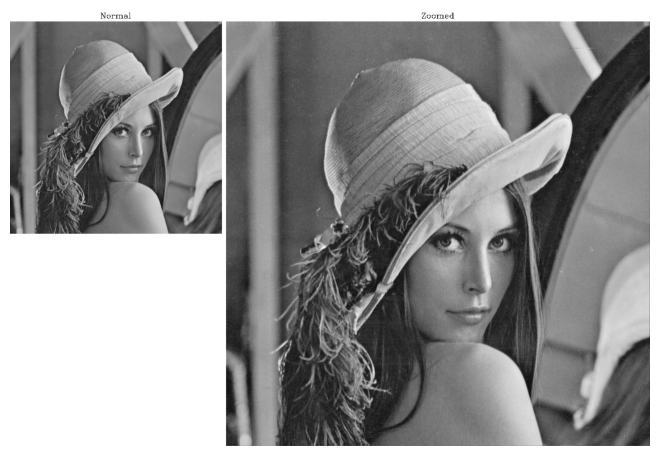

Output image saved in output_images/q2/zoomed.png


In [6]:
# ================= This is done because all code files are stored inside 'code', harms intellisense though :(
#                   This is because we can't import a package from within jupyter(at least, I couldn't make it work)
import sys
sys.path.append("./code")
# =================

import cv_utils
from zoom import zoom_grayscale_image_fourier
import cv2

OUTPUT_PATH = "output_images/q2" # question 2 part 2

img = cv2.imread("input_images/Lenna.png", cv2.IMREAD_GRAYSCALE)
scale = 2
zoomed_image = zoom_grayscale_image_fourier(img, scale)
cv_utils.display_images_notebook(titles=["Normal", "Zoomed"], images=[img, zoomed_image], resize=False)

output_file = f"{OUTPUT_PATH}/zoomed.png"
cv_utils.save_image(zoomed_image, output_file)
print(f"Output image saved in {output_file}")


### 2.3

$$f(t) = \sin(2\pi nt)$$

Need to prove:
$$\forall n\mathfrak{\in R,\ \ }\mathcal{F}\left( f(t) \right) = \frac{i}{2}\left( \delta(f + n) - \delta(f - n) \right)$$

\begin{align*}
\mathcal{F}\left( f(t) \right) &= \int_{-\infty}^{\infty} f(t) \cdot e^{-j2\pi ft} \, dt
= \int_{-\infty}^{\infty} \sin(2\pi nt) \cdot e^{-j2\pi ft} \, dt \\
&= \int_{-\infty}^{\infty} \left( \frac{e^{j2\pi nt} - e^{-j2\pi nt}}{2j} \right) \cdot e^{-j2\pi ft} \, dt \\
&= \frac{1}{2j} \int_{-\infty}^{\infty} \big( e^{j2\pi(n-f)t} - e^{-j2\pi(n+f)t} \big) \, dt \\
&= \frac{1}{2j} \left( \int_{-\infty}^{\infty} e^{-j2\pi(f-n)t} \, dt 
    - \int_{-\infty}^{\infty} e^{-j2\pi(f+n)t} \, dt \right) \\
&= \frac{1}{2j} \left( I_{1} - I_{2} \right) 
= -\frac{j}{2} \left( I_{1} - I_{2} \right) \\
&= \frac{j}{2} \left( I_{2} - I_{1} \right).
\end{align*}

From the definition of impulse, we get that

$$\delta^{'}(f)\mathcal{= F}\left\lbrack \delta(t) \right\rbrack = \int_{- \infty}^{\infty}{\delta(t) \times e^{- j2\pi ft}{dt}} = e^{- j2\pi \times 0 \times t} = 1$$

We also know that
$\delta^{'}(f) = 1(t)\mathcal{= F}\left\lbrack \delta( - t) \right\rbrack = \delta^{'}( - f)$

And from the $(*)$ duality property we get that

$$\mathcal{F}\left\lbrack 1(t) \right\rbrack\mathcal{= F}\left\lbrack \delta^{'}(f) \right\rbrack\mathcal{= F}\left\lbrack \delta^{'}( - f) \right\rbrack\overset{(*)}{{=}}\delta(f)$$

Meaning that $\mathcal{F}\left\lbrack 1(t) \right\rbrack = \delta(f)$.

From the definition of Fourier transformations, we know that

$$\delta(f) = \mathcal{F}\left\lbrack 1(t) \right\rbrack = \int_{- \infty}^{\infty}{e^{- j2\pi ft}{dt}}$$

And so,

$${I_{1} = \int_{- \infty}^{\infty}{e^{- j2\pi(f - n)t}{dt}} = \delta(f - n)}$$
$${I_{2} = \int_{- \infty}^{\infty}{e^{- j2\pi(f + n)t}{dt}} = \delta(f + n)}$$

Substituting this result back, we get that

$$\mathcal{F}\left( f(t) \right) = \frac{j}{2}\left( I_{2} - I_{1} \right) = \frac{j}{2}\left( \delta(f + n) - \delta(f - n) \right)$$

As required.


## Question 3

Image of dimensions $M \times N$ is defined as

$$f(m,n) = \sin\left( 2\pi\left( u_{0}m + v_{0}n \right) \right)$$

Need to show:

$$\widehat{f}(u,v) = \frac{j}{2}\left( \delta\left( u + Mu_{0},v + Nv_{0} \right) - \delta\left( u - Mu_{0},v - Nv_{0} \right) \right)$$

Using Euler's Formula, we know that

$$\sin(a) = \frac{e^{ja} - e^{- ja}}{2j}$$

Plugging it in our function, we get

$$f(m,n) = \frac{e^{j2\pi\left( u_{0}m + v_{0}n \right)} - e^{- j2\pi\left( u_{0}m + v_{0}n \right)}}{2j}$$

Helper lemma:

$$\mathcal{F}\left\lbrack \delta(x,y) \right\rbrack = \sum_{x = 0}^{M - 1}{\sum_{y = 0}^{N - 1}{\delta(x,y)e^{- j2\pi\left( \frac{ux}{M} + \frac{vy}{N} \right)}}} = e^{- j2\pi\left( \frac{u_{0}0}{M} + \frac{v_{0}0}{N} \right)} = e^{0} = 1$$

Therefore, $\delta(x,y) \leftrightarrow 1(u,v)$

\begin{align*}
\widehat{f}(u,v) 
&= \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x,y) e^{-j2\pi\left( \frac{ux}{M} + \frac{vy}{N} \right)} \\
&= \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} 
    \frac{e^{j2\pi\left( u_{0}x + v_{0}y \right)} - e^{-j2\pi\left( u_{0}x + v_{0}y \right)}}{2j} 
    e^{-j2\pi\left( \frac{ux}{M} + \frac{vy}{N} \right)} \\
&= \frac{1}{2j} \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} 
    \left( e^{j2\pi\left( u_{0}x + v_{0}y \right)} - e^{-j2\pi\left( u_{0}x + v_{0}y \right)} \right) 
    e^{-j2\pi\left( \frac{ux}{M} + \frac{vy}{N} \right)} \\
&= \frac{1}{2j} \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} 
    \left( e^{j2\pi\left( u_{0}x + v_{0}y - \frac{ux}{M} - \frac{vy}{N} \right)} 
    - e^{-j2\pi\left( u_{0}x + v_{0}y + \frac{ux}{M} + \frac{vy}{N} \right)} \right) \\
&= \frac{1}{2j} \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} 
    \left( e^{j2\pi x\left( u_{0} - \frac{u}{M} \right) + j2\pi y\left( v_{0} - \frac{v}{N} \right)} 
    - e^{-j2\pi x\left( u_{0} + \frac{u}{M} \right) - j2\pi y\left( v_{0} + \frac{v}{N} \right)} \right) \\
&= \frac{1}{2j} \Bigg( 
    \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} 
    e^{-j2\pi\left[ x\left( \frac{u - Mu_{0}}{M} \right) + y\left( \frac{v - Nv_{0}}{N} \right) \right]} - \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} 
    e^{-j2\pi\left[ x\left( \frac{u + Mu_{0}}{M} \right) + y\left( \frac{v + Nv_{0}}{N} \right) \right]} 
    \Bigg) \\
&= \frac{j}{2} \Bigg( 
    \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} 
    e^{-j2\pi\left[ x\left( \frac{u + Mu_{0}}{M} \right) + y\left( \frac{v + Nv_{0}}{N} \right) \right]} - \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} 
    e^{-j2\pi\left[ x\left( \frac{u - Mu_{0}}{M} \right) + y\left( \frac{v - Nv_{0}}{N} \right) \right]} 
    \Bigg).
\end{align*}

Each of these sums is a Fourier transformation of $f(x,y) = 1$, with its
parameters being $(u,v) = \left( u + Mu_{0},v + Nv_{0} \right)$ and
$(u,v) = \left( u - Mu_{0},v - Nv_{0} \right)$, respectively.

And so, we get that

\begin{align*}
&\frac{j}{2} \Bigg( 
    \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} 
    e^{-j2\pi \left[ x\left( \frac{u + Mu_{0}}{M} \right) + y\left( \frac{v + Nv_{0}}{N} \right) \right]} -
    \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} 
    e^{-j2\pi \left[ x\left( \frac{u - Mu_{0}}{M} \right) + y\left( \frac{v - Nv_{0}}{N} \right) \right]} 
\Bigg) \\
&= \frac{j}{2} \Bigg( 
    \mathcal{F}^{-1} \left[ 1(x,y) \right] 
    \left( u + Mu_{0}, v + Nv_{0} \right)
    - \mathcal{F}^{-1} \left[ 1(x,y) \right] 
    \left( u - Mu_{0}, v - Nv_{0} \right) 
\Bigg).
\end{align*}

We've already established that $\delta(x,y) \leftrightarrow 1(u,v)$,
meaning
$\mathcal{F}^{- 1}\left\lbrack 1(x,y) \right\rbrack = \delta(u,v)$

Putting it all together we got that

\begin{align*}
\frac{j}{2} \Bigg( 
    &\sum_{x=0}^{M-1} \sum_{y=0}^{N-1} 
    e^{-j2\pi \left[ x\left( \frac{u + Mu_{0}}{M} \right) + y\left( \frac{v + Nv_{0}}{N} \right) \right]}
    - \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} 
    e^{-j2\pi \left[ x\left( \frac{u - Mu_{0}}{M} \right) + y\left( \frac{v - Nv_{0}}{N} \right) \right]} 
\Bigg) \\
&= \frac{j}{2} \Bigg( 
    \mathcal{F}^{-1} \left[ 1 \right] 
    \left( u + Mu_{0}, v + Nv_{0} \right) 
    - \mathcal{F}^{-1} \left[ 1 \right] 
    \left( u - Mu_{0}, v - Nv_{0} \right) 
\Bigg) \\
&= \frac{j}{2} \Big( 
    \delta\left( u + Mu_{0}, v + Nv_{0} \right) 
    - \delta\left( u - Mu_{0}, v - Nv_{0} \right) 
\Big).
\end{align*}

And so, we've shown that-

\begin{align*}
\widehat{f}(u, v)
&= \frac{j}{2} \Bigg( 
    \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} 
    e^{-j2\pi \left[ x\left( \frac{u + Mu_{0}}{M} \right) + y\left( \frac{v + Nv_{0}}{N} \right) \right]}
    - \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} 
    e^{-j2\pi \left[ x\left( \frac{u - Mu_{0}}{M} \right) + y\left( \frac{v - Nv_{0}}{N} \right) \right]} 
\Bigg) \\
&= \frac{j}{2} \Big( 
    \delta\left( u + Mu_{0}, v + Nv_{0} \right) 
    - \delta\left( u - Mu_{0}, v - Nv_{0} \right) 
\Big).
\end{align*}

As required.


## Question 4

### 4.18
Show that the 1-D convolution theorem also holds for
[discrete]{.underline} variables:

$${(f*h)(x) \Longleftrightarrow \left( \widehat{f}\  \times \widehat{h} \right)(u)}$$
$${(f \times h)(x) \Longleftrightarrow \frac{1}{M}\left( \widehat{f}*\widehat{h} \right)(u)}$$

While letting the DFT of $f,h$ be $\widehat{f},\widehat{h}$,
respectively.

The functions are sampled with $M$ sample points.

#### Proof 1
Want to prove:
$${(f*h)(x) \Longleftrightarrow \left( \widehat{f}\  \times \widehat{h} \right)(u)}$$


\begin{align*}
(f * h)(x) &= \sum_{k=0}^{M-1} f(k) h(x - k), \\
\mathcal{F}\left[ (f * h) \right](u) 
&= \sum_{x=0}^{M-1} (f * h)(x) \cdot e^{-\frac{j 2 \pi u x}{M}} \\
&= \sum_{x=0}^{M-1} \sum_{k=0}^{M-1} f(k) h(x - k) \cdot e^{-\frac{j 2 \pi u x}{M}} \\
&= \sum_{k=0}^{M-1} f(k) \sum_{x=0}^{M-1} h(x - k) \cdot e^{-\frac{j 2 \pi u x}{M}} \\
&\overset{(*)}{=} \sum_{k=0}^{M-1} f(k) \cdot \widehat{h}(u) e^{-\frac{j 2 \pi u k}{M}} \\
&= \widehat{h}(u) \cdot \sum_{k=0}^{M-1} f(k) e^{-\frac{j 2 \pi u k}{M}} \\
&= \widehat{h}(u) \cdot \widehat{f}(u) \\
&= \left( \widehat{f} \cdot \widehat{h} \right)(u).
\end{align*}

$(*)$ From the translation property we know that
$h(x - k) \leftrightarrow \widehat{h}(u)e^{- j2\pi uk}$

And so, we've shown the first part of the convolution theorem-
$(f*h)(x) \Longleftrightarrow \left( \widehat{f}\  \times \widehat{h} \right)(u)$.

#### Proof 2

Want to prove:
$${(f \times h)(x) \Longleftrightarrow \frac{1}{M}\left( \widehat{f}*\widehat{h} \right)(u)}$$

\begin{align*}
\frac{1}{M} \left( \widehat{f} * \widehat{h} \right)(u) 
&= \frac{1}{M} \sum_{u=0}^{M-1} \widehat{f}(k) \widehat{h}(u - k), \\
\mathcal{F}^{-1}\left[ \frac{1}{M} \left( \widehat{f} * \widehat{h} \right) \right](x) 
&= \frac{1}{M} \times \frac{1}{M} \sum_{u=0}^{M-1} \left( \widehat{f} * \widehat{h} \right)(u) \cdot e^{\frac{j 2 \pi x u}{M}}, \\
&= \frac{1}{M^2} \sum_{u=0}^{M-1} \sum_{k=0}^{M-1} \widehat{f}(k) \widehat{h}(u - k) \cdot e^{\frac{j 2 \pi x u}{M}}, \\
&= \frac{1}{M^2} \sum_{k=0}^{M-1} \widehat{f}(k) \sum_{u=0}^{M-1} \widehat{h}(u - k) \cdot e^{\frac{j 2 \pi x u}{M}}, \\
&= \frac{1}{M} \sum_{k=0}^{M-1} \widehat{f}(k) \times \frac{1}{M} \sum_{u=0}^{M-1} \widehat{h}(u - k) \cdot e^{\frac{j 2 \pi x u}{M}}, \\
&\overset{(*)}{=} \frac{1}{M} \sum_{k=0}^{M-1} \widehat{f}(k) \cdot h(x) \cdot e^{\frac{j 2 \pi x k}{M}}, \\
&= h(x) \times \frac{1}{M} \sum_{k=0}^{M-1} \widehat{f}(k) \cdot e^{\frac{j 2 \pi x k}{M}}, \\
&= h(x) \times f(x) = (f * h)(x).
\end{align*}

$(*)$ From the translation property we know that
$\widehat{h}(u - k) \leftrightarrow h(x)e^{j2\pi xk}$

And so, we've shown the second part of the convolution theorem-
$(f \times h)(x) \Longleftrightarrow \frac{1}{M}\left( \widehat{f}*\widehat{h} \right)(u)$.

$$
$$

### 4.20
Use the sifting property of the 2-D impulse to show that convolution of
a 2-D continuous function, $f(t,z)$, with an impulse shifts the function
so that its origin is located at the location of the impulse.

The sifting property (4-55):

$$\int_{- \infty}^{\infty}{\int_{- \infty}^{\infty}{f(x,y) \times \delta(x - u,y - v)dx}dy} = f(u,v)$$

Show:

$$f(t,z)*\delta\left( u - u_{0},v - v_{0} \right) = f\left( u - u_{0},v - v_{0} \right)$$

#### Proof

$$f(t,z)*\delta\left( u - u_{0},v - v_{0} \right) = \int_{- \infty}^{\infty}{\int_{- \infty}^{\infty}{f(x,y) \times \delta\left( u - u_{0} - x,v - v_{0} - y \right)dx}dy}$$

Using the sifting property, with the origin located at
$\left( t_{1},t_{2} \right) = \left( u - u_{0},v - v_{0} \right)$ we get
that

\begin{align*}
f(t,z) * \delta\left( u - u_0, v - v_0 \right) 
&= \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x,y) \cdot \delta\left( u - u_0 - x, v - v_0 - y \right) \, dx \, dy, \\
&= \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x,y) \cdot \delta\left( t_1 - x, t_2 - y \right) \, dx \, dy, \\
&\overset{(*)}{=} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x,y) \cdot \delta\left( x - t_1, y - t_2 \right) \, dx \, dy, \\
&= f(t_1, t_2) = f(u - u_0, v - v_0).
\end{align*}

Therefore,
$f(t,z)*\delta\left( u - u_{0},v - v_{0} \right) = f\left( u - u_{0},v - v_{0} \right)$
